In [1]:
import sys
sys.path.append("../")

from pprint import pprint
from Core.maze import Maze, INF

import random
from queue import PriorityQueue

In [2]:
def uniform_cost_search(maze, start, end):
    
    # setup
    explored = set()
    frontier = PriorityQueue()
    node = start
    cost = 0
    n_rows = len(maze.grid)
    n_cols = len(maze.grid[0])
    parents = [[(-1, -1)]*n_cols for i in range(n_rows)]


    # init
    frontier.put((cost, node))
    while not frontier.empty():
        cost, node = frontier.get()
        if node == end:
            return True, cost, parents

        explored.add(node)
        x, y = node

        neighbors = maze.grid[x][y].neighbors
        if neighbors['N'] != INF and (x-1, y) not in explored and x>0:
            frontier.put((cost+neighbors['N'], (x-1, y)))
            parents[x-1][y] = (x, y)
        if neighbors['S'] != INF and (x+1, y) not in explored and x+1<n_rows:
            frontier.put((cost+neighbors['S'], (x+1, y)))
            parents[x+1][y] = (x, y)
        if neighbors['E'] != INF and (x, y+1) not in explored and y+1<n_cols:
            frontier.put((cost+neighbors['E'], (x, y+1)))
            parents[x][y+1] = (x, y)
        if neighbors['W'] != INF and (x, y-1) not in explored and y>0:
            frontier.put((cost+neighbors['W'], (x, y-1)))
            parents[x][y-1] = (x, y)


    return False, -1, []


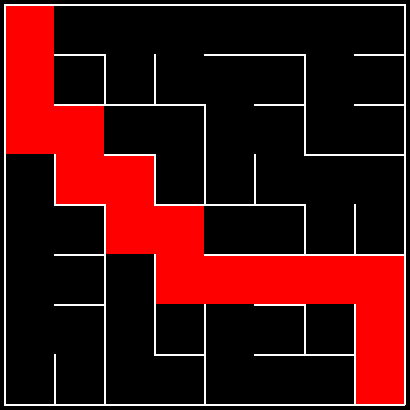

In [3]:
maze = Maze()
maze.load("BinaryTree_8x8.maze")

start = (0, 0)
end = (8-1, 8-1)

found, cost, parents = uniform_cost_search(maze, start, end)

node = end
path = [node]
while node != start:
    node = parents[node[0]][node[1]]
    path.append(node)

if found:
    # print("Cost is: ", cost)
    # print(path)
    maze.add_colors(path = path)
    display(maze.draw())
else:
    print("Path not found!")

# Uniform Cost Search

## Dijkstra VS UCS
Dijkstra's Algorithm find the shortest path from the start node to all other nodess. But, we don't need to do that, since we have a goal in mind already. We can stop as soon as we reach the goal. This speeds up the algorithm for our purposes.

We also note the fewer space requirements in the UCS algorithm. Since we do not assign all the nodes with -inf weight; we simply insert into the Priority Queue as we find a better and better node. In essence, the UCS algorithm takes lesser time, and lesser space than the dijkstra.

NOTE: One bonus is that it works on mazes and graphs that are not fully formed, that is, one where the nodes are generated on-the-go. This dijkstra can not do.

## UCS as Special Case of A*
See also- Proof of Correctness of A*
UCS uses the evaluation function f(n)=g(n), where g(n) is the length of the path from the starting node to n, whereas A* uses the evaluation function f(n)=g(n)+h(n), where g(n) means the same thing as in UCS and h(n), called the "heuristic" function, is an estimate of the distance from n to the goal node. In the A* algorithm, h(n) must be admissible.

UCS is a special case of A* which corresponds to having h(n)=0,∀n. A heuristic function h which has h(n)=0, ∀n, is clearly admissible, because it always "underestimates" the distance to the goal, which cannot be smaller than 0, unless you have negative edges (but we assume that all edges are non-negative).

## Proof of Optimality
Proof by Induction

base case: when the start node is same as the end node, we already have the optimal solution

lets assume that we have the optimal solution for k distance up till now. Now, the way UCS works is that we pick the node with the least weight in total up till now. This means that the new node we will append will be the least of all possible nodes we could have picked. Thus, we have the optimal solution for k distance as well

## Complexity
We briefly touched on how both are less than that of Dijkstra, but how much, exactly?
Let's continue our discussion in terms of the length of path, since we are trying to get the best one. Let that be C*. Given that each edge cost is aleast e (e=1 for our purposes), we can say that we took C*/e steps to get to the point. But, we also have to consider that we take in b number of neighbors each time to make a decision. Thus we have b=4 in our case. 

So we have both space and time complexity giving us O(b^(c*//e + 1)).
